In [41]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split

In [42]:
dir_train='/kaggle/input/cats-vs-tiger/archive/train'
dir_test='/kaggle/input/cats-vs-tiger/archive/test'

In [43]:
Name=[]
for file in os.listdir(dir_train):
    Name+=[file]
print(Name)
print(len(Name))

['dogs', 'cats']
2


In [44]:
N=[]
for i in range(len(Name)):
    N+=[i]
    
normal_mapping=dict(zip(Name,N)) 
reverse_mapping=dict(zip(N,Name)) 

def mapper(value):
    return reverse_mapping[value]

In [45]:
dataset=[]
count=0
for name in Name:
    path=os.path.join(dir_train,name)
    for im in os.listdir(path):
        if im[-4:]=='.jpg':
            image=load_img(os.path.join(path,im), grayscale=False, color_mode='rgb', target_size=(100,100))
            image=img_to_array(image)
            image=image/255.0
            dataset.append([image,count])
    count=count+1

In [46]:
testset=[]
count=0
for name in Name:
    path=os.path.join(dir_test,name)
    for im in os.listdir(path):
        if im[-4:]=='.jpg':
            image=load_img(os.path.join(path,im), grayscale=False, color_mode='rgb', target_size=(100,100))
            image=img_to_array(image)
            image=image/255.0
            testset.append([image,count])
    count=count+1

In [47]:
data,labels0=zip(*dataset)
test,tlabels0=zip(*testset)

In [48]:
labels1=to_categorical(labels0)
data=np.array(data)
labels=np.array(labels1)

In [49]:
tlabels1=to_categorical(tlabels0)
test=np.array(test)
tlabels=np.array(tlabels1)

In [50]:
trainx,testx,trainy,testy=train_test_split(data,labels,test_size=0.2,random_state=44)

In [51]:
print(trainx.shape)
print(testx.shape)
print(trainy.shape)
print(testy.shape)

(16000, 100, 100, 3)
(4000, 100, 100, 3)
(16000, 2)
(4000, 2)


In [52]:
datagen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,rotation_range=50,zoom_range=0.5,
                        width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,fill_mode="nearest")

In [53]:
pretrained_model3 = tf.keras.applications.DenseNet121(input_shape=(100,100,3),include_top=False,weights='imagenet',pooling='avg')
pretrained_model3.trainable = False

29089792/29084464 [==============================] - 2s 0us/step


In [54]:
inputs3 = pretrained_model3.input
x3 = tf.keras.layers.Dense(128, activation='relu')(pretrained_model3.output)
outputs3 = tf.keras.layers.Dense(2, activation='softmax')(x3)
model = tf.keras.Model(inputs=inputs3, outputs=outputs3)

In [55]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [56]:
his=model.fit(datagen.flow(trainx,trainy,batch_size=32),validation_data=(testx,testy),epochs=50)

Epoch 1/50
500/500 [==============================] - 332s 649ms/step - loss: 0.6149 - accuracy: 0.7308 - val_loss: 0.2048 - val_accuracy: 0.9107
Epoch 2/50
500/500 [==============================] - 320s 639ms/step - loss: 0.4105 - accuracy: 0.8028 - val_loss: 0.2148 - val_accuracy: 0.9060
Epoch 3/50
500/500 [==============================] - 316s 633ms/step - loss: 0.3931 - accuracy: 0.8211 - val_loss: 0.2140 - val_accuracy: 0.9103
Epoch 4/50
500/500 [==============================] - 316s 632ms/step - loss: 0.3713 - accuracy: 0.8279 - val_loss: 0.1870 - val_accuracy: 0.9205
Epoch 5/50
500/500 [==============================] - 316s 631ms/step - loss: 0.3689 - accuracy: 0.8270 - val_loss: 0.1819 - val_accuracy: 0.9195
Epoch 6/50
500/500 [==============================] - 317s 633ms/step - loss: 0.3638 - accuracy: 0.8313 - val_loss: 0.1928 - val_accuracy: 0.9168
Epoch 7/50
500/500 [==============================] - 316s 633ms/step - loss: 0.3635 - accuracy: 0.8375 - val_loss: 0.1847 -

In [57]:
y_pred=model.predict(testx)
pred=np.argmax(y_pred,axis=1)
ground = np.argmax(testy,axis=1)
print(classification_report(ground,pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94      2011
           1       0.95      0.92      0.94      1989

    accuracy                           0.94      4000
   macro avg       0.94      0.94      0.94      4000
weighted avg       0.94      0.94      0.94      4000



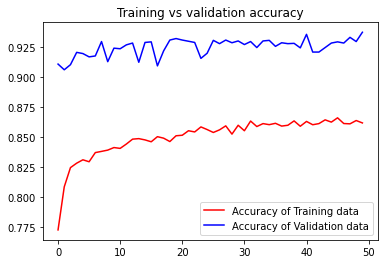

<Figure size 432x288 with 0 Axes>

In [58]:
get_acc = his.history['accuracy']
value_acc = his.history['val_accuracy']
get_loss = his.history['loss']
validation_loss = his.history['val_loss']

epochs = range(len(get_acc))
plt.plot(epochs, get_acc, 'r', label='Accuracy of Training data')
plt.plot(epochs, value_acc, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

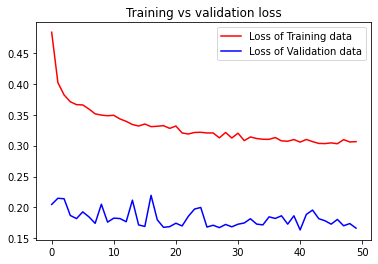

<Figure size 432x288 with 0 Axes>

In [59]:
epochs = range(len(get_loss))
plt.plot(epochs, get_loss, 'r', label='Loss of Training data')
plt.plot(epochs, validation_loss, 'b', label='Loss of Validation data')
plt.title('Training vs validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

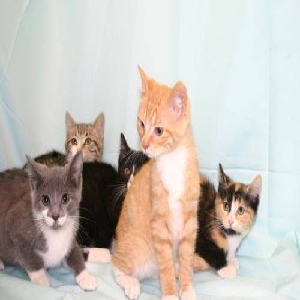

In [60]:
load_img("/kaggle/input/cats-vs-tiger/archive/test/cats/cat.10086.jpg",target_size=(300,300))

In [61]:
image=load_img("/kaggle/input/cats-vs-tiger/archive/test/cats/cat.10086.jpg",target_size=(100,100))

image=img_to_array(image) 
image=image/255.0
prediction_image=np.array(image)
prediction_image= np.expand_dims(image, axis=0)

In [62]:
prediction=model.predict(prediction_image)
value=np.argmax(prediction)
name=mapper(value)
print("Prediction is {}.".format(name))

Prediction is cats.


In [63]:
print(test.shape)
prediction2=model.predict(test)
print(prediction2.shape)

PRED=[]
for item in prediction2:
    value2=np.argmax(item)      
    PRED+=[value2]

(4994, 100, 100, 3)
(4994, 2)


In [64]:
ANS=tlabels0

In [65]:
accuracy=accuracy_score(ANS,PRED)
print(accuracy)

0.9365238285943132
